# Jupyter to html

## 1. Resumen

Vamos a ver una pequeña introducción a la librería de manipulación y analisis de datos `Pandas`. Con ella podremos manejar y procesar datos tabulares que nos ayudará para poder operar con ellos y obtener información de una manera muy valiosa

![pandas](https://github.com/DeepMaxFN/DeepMaxFN-blog/blob/master/images/pandas-icon.png?raw=true)

## 2. ¿Qué es Pandas?

Pandas es una librería de Python que está diseñada para que el trabajo con datos *relacionales* o *etiquetados* sea fácil e intuitivo

Pandas está diseñado para muchos tipos diferentes de datos:

*   Datos tabulares con columnas de tipos heterogéneos, como en una tabla SQL o una hoja de cálculo de Excel
*   Datos de series de tiempo ordenados y desordenados (no necesariamente de frecuencia fija).
*   Datos matriciales arbitrarios (homogéneos o heterogéneos) con etiquetas de fila y columna
*   Cualquier otra forma de conjuntos de datos observacionales/estadísticos. No es necesario etiquetar los datos en absoluto para colocarlos en una estructura de datos de pandas.

Las dos estructuras de datos principales de Pandas son las `Serie`s (unidimensional) y los `DataFrame`s (bidimensional). Pandas está construido sobre NumPy y está destinado a integrarse bien dentro de un entorno informático científico con muchas otras bibliotecas de terceros.

Para los científicos de datos, el trabajo con datos generalmente se divide en varias etapas: recopilar y limpiar datos, analizarlos/modelarlos y luego organizar los resultados del análisis en una forma adecuada para trazarlos o mostrarlos en forma de tabla. Pandas es la herramienta ideal para todas estas tareas.

Otra característica es que pandas es rápido, muchos de los algoritmos de bajo nivel se han construido en `C`

### 2.1. Pandas como `pd`

Generalmente a la hora de importar Pandas se suele importar con el alias de `pd`

In [1]:
import pandas as pd

print(pd.__version__)

1.1.5
1.1.6
1.1.7


In [1]:
dhasjk

NameError: name 'dhasjk' is not defined

## 3. Estructuras de datos de Pandas

En Pandas existen dos tipos de estructuras de datos: las `Serie`s y los `DataFrame`s

### 3.1. Series

El tipo de dato `Serie` es una matriz etiquetada unidimensional capaz de contener cualquier tipo de datos (enteros, cadenas, números de punto flotante, objetos Python, etc.). Están divididas en índices.

Para crear un tipo de dato `Serie` la forma más común es

``` python
serie = pd.Series(data, index=index)
```

Donde `data` puede ser
* Un diccionario
* Una lista o tupla
* Un ndarray de Numpy
* Un valor escalar

#### 3.1.1. Series desde un diccionario

In [ ]:
diccionario = {"b": 1, "a": 0, "c": 2}

serie = pd.Series(diccionario)
serie

b    1
a    0
c    2
dtype: int64

### 3.2. DataFrames

Un `DataFrame` es una estructura de datos etiquetada y bidimensional, con columnas de tipos potencialmente diferentes, es decir, en una columna puede haber datos de tipo entero, en otra columna datos de tipo string, etc. Puede pensar en ello como una hoja de cálculo o una tabla SQL, o un diccionario de objetos `Serie`s. 

Es el objeto pandas más utilizado. Al igual que las `Serie`s, los `DataFrame`s aceptan muchos tipos diferentes de entrada:

Junto con los datos, opcionalmente puede pasar argumentos de índice (etiquetas de fila) y columnas (etiquetas de columna). Si pasa un índice y/o columnas, está garantizando el índice y/o columnas del `DataFrame` resultante. Por lo tanto, un diccionario de `Serie`s más un índice específico descartará todos los datos que no coincidan con el índice pasado

Si no se pasan las etiquetas de los ejes, se construirán a partir de los datos de entrada basándose en reglas de sentido común.

#### 3.2.1. DataFrames desde un diccionario de Series

Si se pasa un diccionario con `Serie`s se creará el `DataFrame` con tantas columnas como `Serie`s tenga el diccionario

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0]),
    "dos": pd.Series([4.0, 5.0, 6.0, 7.0])
    }

dataframe = pd.DataFrame(diccionario)
dataframe

uno  dos
0  1.0  4.0
1  2.0  5.0
2  3.0  6.0
3  NaN  7.0

## 4. Exploración de un DataFrame

Cuando un `DataFrame` es muy grande no se puede representar entero

In [ ]:
california_housing_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
california_housing_train

longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]

### 4.3. Información del DataFrame

Otro método muy util es `info()` que nos da información del `DataFrame`

In [ ]:
california_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### 4.4. Filas y columnas DataFrame

Se pueden obtener los índices y las columnas de un `DataFrame` mediante los métodos `index` y `columns`

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "dos": pd.Series([4.0, 5.0, 6.0, 7.0], index=["a", "b", "c", "d"])
    }

dataframe = pd.DataFrame(diccionario)

indices = dataframe.index
columnas = dataframe.columns
print(f"El DataFrame tiene los índices\n\t{indices}\n")
print(f"El DataFrame tiene las columnas\n\t{columnas}")

El DataFrame tiene los índices
	Index(['a', 'b', 'c', 'd'], dtype='object')

El DataFrame tiene las columnas
	Index(['uno', 'dos'], dtype='object')


## 10. Lectura de datos de fuentes externas

Una de las mayores fortalezas de Pandas es poder leer datos de archivos, por lo que no es necesario crearse un `DataFrame` con los datos que se quieren procesar, sino que se pueden leer de un archivo

De la misma manera que se pueden crear `DataFrame`s de archivos externos, también se pueden guardar `DataFrame`s en archivos, para así crearte tu propio set de datos, configurarlo de la manera que quieras y guardarlo en un archivo para poder usarlo más adelante

En la siguiente tabla se muestran las funciones para leer y escribir archivos de distintos formatos

|Fromato|Tipo de archivo|Función de lectura|Función de escritura|
|---|---|---|---|
|texto|CSV|[read_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)|[to_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)|
|texto|Fixed-Width Text File|[read_fwf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-fwf-reader)||
|texto|JSON|[read_json](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-json-reader)|[to_json](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-json-writer)|
|texto|HTML|[read_html](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-html)|[to_html](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-html)|
|texto|Local clipboard|[read_clipboard](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-clipboard)|[to_clipboard](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-clipboard)|
|binary|MS Excel|[read_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader)|[to_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-writer)|
|binary|OpenDocument|[read_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-ods)|
|binary|HDF5 Format|[read_hdf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)|[to_hdf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)|
|binary|Feather Format|[read_feather](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-feather)|[to_feather](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-feather)|
|binary|Parquet Format|[read_parquet](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-parquet)|[to_parquet](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-parquet)|
|binary|ORC Format|[read_orc](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-orc)|
|binary|Msgpack|[read_msgpack](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-msgpack)|[to_msgpack](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-msgpack)|
|binary|Stata|[read_stata](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-stata-reader)|[to_stata](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-stata-writer)|
|binary|SAS|[read_sas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sas-reader)|
|binary|SPSS|[read_spss](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-spss-reader)|
|binary|Python Pickle Format|[read_pickle](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-pickle)|[to_pickle](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-pickle)|
|SQL|SQL|[read_sql](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sql)|[to_sql](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sql)|
|SQL|Google BigQuery|[read_gbq](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-bigquery)|[to_gbq](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-bigquery)|

> Tip: Poniendo la variable `inplace=True` se modifica el `DataFrame` sobre el que se está operando, así no hace falta escribir
``` Python
dataframe = dataframe.fillna(value=5.5)
```

## 16. Gráficos

Pandas ofrece la posibilidad de representar los datos de nuestros `DataFrame`s en gráficos para poder obtener una mejor representación de ello. Para ello hace uso de la librería `matplotlib` que veremos en el siguiente post

### 16.1. Gráfica básica

Para representar los datos en una gráfica la manera más fácil es usar el método `plot()`

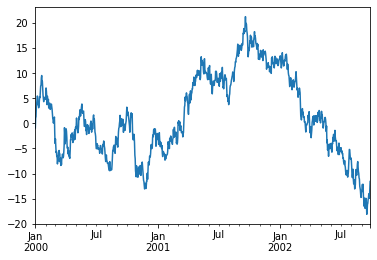

In [13]:
serie = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
serie = serie.cumsum()

serie.plot()

En el caso de tener un `DataFrame` el método `plot()` representará cada una de las columnas del `DataFrame`

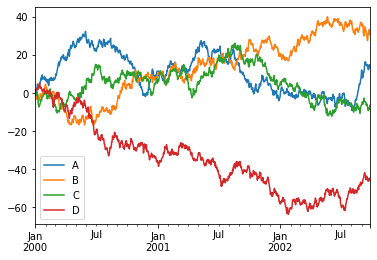

In [15]:
dataframe = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
dataframe = dataframe.cumsum()

dataframe.plot()

### 16.2. Diagrama de barras vertical

Hay más métodos de crear gráficos, como el diagrama de barras vertical mediante `plot.bar()`

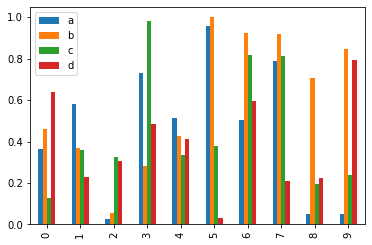

In [19]:
dataframe = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
dataframe.plot.bar()

Si queremos apilar las barras lo indicamos mediante la variable `stacked=True`

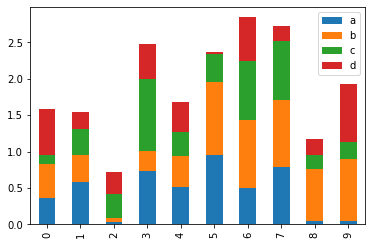

In [20]:
dataframe.plot.bar(stacked=True)

### 16.3. Diagrama de barras horizontal

Para crear un diagrama de barras horizontal usamos `plot.barh()`

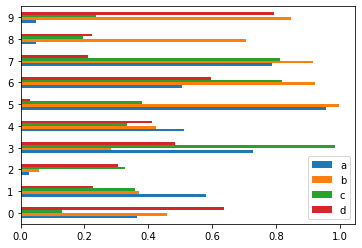

In [21]:
dataframe.plot.barh()

Si queremos apilar las barras lo indicamos mediante la variable `stacked=True`

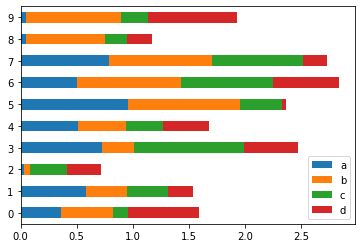

In [22]:
dataframe.plot.barh(stacked=True)

### 16.4. Histograma

Para crear un histograma usamos `plot.hist()`

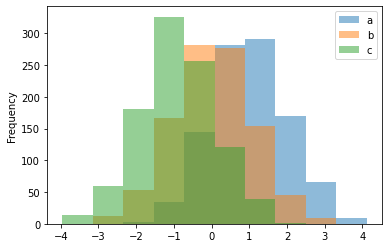

In [28]:
dataframe = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    }
)

dataframe.plot.hist(alpha=0.5)

Si queremos apilar las barras lo indicamos mediante la variable `stacked=True`

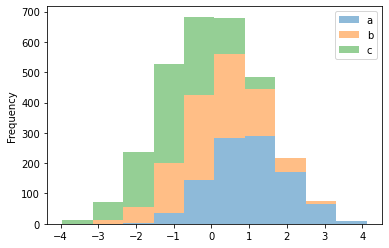

In [29]:
dataframe.plot.hist(alpha=0.5, stacked=True)

Si queremos añadir más columnas, es decir, si queremos que el histograma sea más informativo o preciso, lo indicamos mediante la variable `bins`

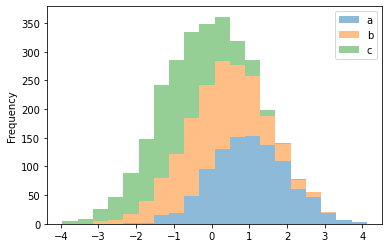

In [30]:
dataframe.plot.hist(alpha=0.5, stacked=True, bins=20)

### 16.5. Diagramas de velas

Para crear un diagrama de velas usamos `plot.box()`

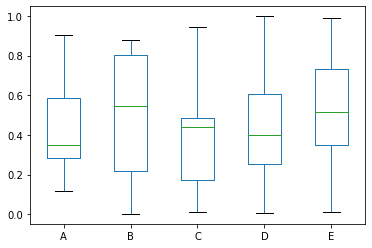

In [34]:
dataframe = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

dataframe.plot.box()

### 16.6. Gráficos de áreas

Para crear un gráfico de áreas usamos `plot.area()`

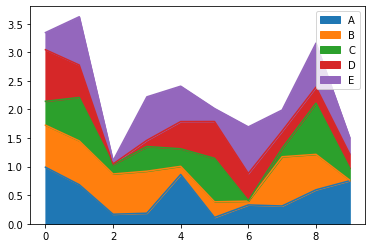

In [36]:
dataframe.plot.area()

### 16.7. Diagrama de dispersión

Para crear un diagrama de dispersión usamos `plot.scatter()`, donde hay que indicar las variables `x` e `y` del diagrama

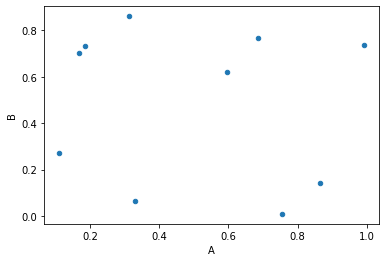

In [38]:
dataframe.plot.scatter(x='A', y='B')

### 16.8. Gráfico de contenedor hexagonal

Para crear un gráfico de contenedor hexagonal usamos `plot.hexbin()`, donde hay que indicar las variables `x` e `y` del diagrama y el tamaño de la malla mediante `gridsize`

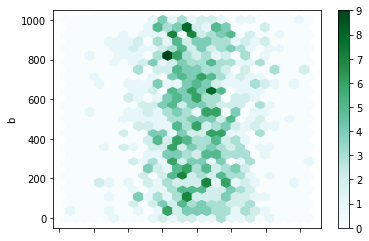

In [40]:
dataframe = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
dataframe["b"] = dataframe["b"] + np.arange(1000)

dataframe.plot.hexbin(x="a", y="b", gridsize=25)